# Lab 8: Define and Solve an ML Problem of Your Choosing

In [30]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [31]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I chose the "census" dataset containing Census information from 1994.
   
2. We will be predicting the occupation of individuals. The label is occupation.

3. This is a supervised learning problem. It is a multi-class classification problem because the target variable, occupation, has multiple distinct categories that need to be predicted. In this context, the possible occupations are not just two categories (which would make it a binary classification problem) but rather a variety of different job roles such as Adm-clerical, Exec-managerial, Handlers-cleaners, and so on. The job roles are categorical, meaning they are distinct and not ordinal or numerical.


4. Here are some features I am considering: race,
education,
age (could provide useful context),
workclass (could add context on job types),
marital-status (could impact job type),
relationship (could provide useful context),
sex_selfID (gender might influence occupation distribution),
hours-per-week (work hours might influence occupation),
native-country (could provide geographic context, immigration?)
   
5.  Predicting occupation based on race and education can provide insights into occupational disparities and help identify areas where there might be systemic biases or inequalities. This information can be valuable for policymakers, organizations aiming to promote diversity and inclusion, and researchers studying labor market trends.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32399 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex_selfID      32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32236 non-null  float64
 13  native-country  31978 non-null  object 
 14  income_binary   32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB
None


In [33]:
print(df.isnull().sum())

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64


In [34]:
print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32399.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.589216  1.897784e+05      10.080679    615.907773     87.303830   
std       13.647862  1.055500e+05       2.572720   2420.191974    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  14084.000000   4356.000000   

       hours-per-week  
count    32236.000000  
mean        40.450428  
std         12.353748  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


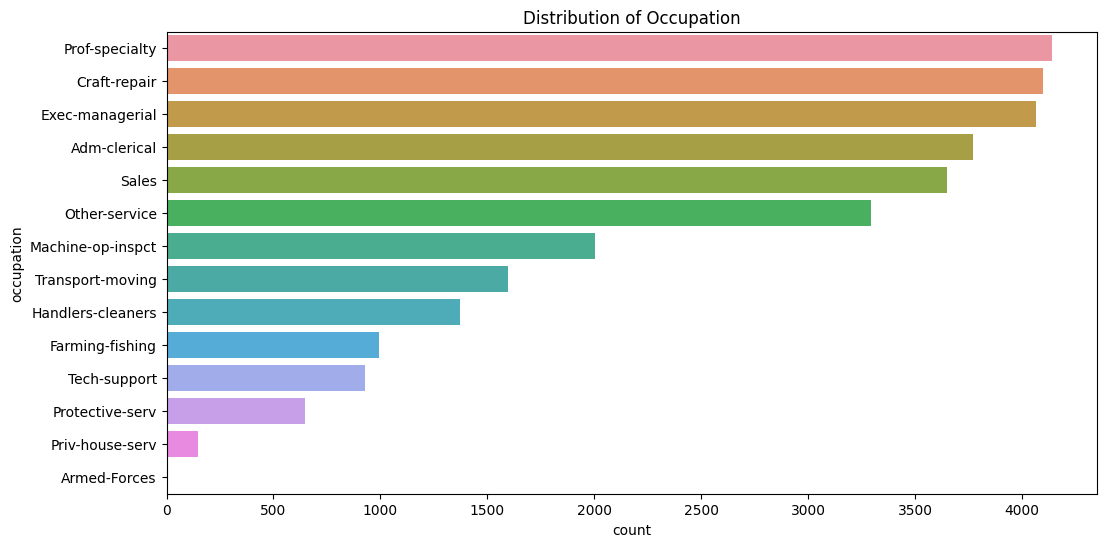

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(y='occupation', data=df, order=df['occupation'].value_counts().index)
plt.title('Distribution of Occupation')
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. I did not change my feature list, although I did originally have the thought of only using occupation, race, gender and education after inspecting the data I realized that there are not a lot of nulls in these other features but there is a lot of nulls in occupation which is why I am to make this my label to predict. Update: After making some changes and testing I removed native-country.

2. I will take the following steps where applicable. 
Handling Missing Values: Replace missing values with appropriate measures such as the mean for numerical data or the most frequent value for categorical data.
One-Hot Encoding: workclass
education
marital-status
relationship
race
sex_selfID
native-country
income_binary
These columns are one-hot encoded because they are categorical variables and machine learning models require numerical inputs.
Outlier Detection: Identify and potentially handle outliers in numerical features.

3. The primary model I will use is the Random Forest Classifier due to its balance of interpretability, performance, and ease of tuning. Becuase of my lack of computational power I prefer Random Forest but, I may also explore the Gradient Boosting Classifier for potentially better performance.

4. Based on what we have learned in class I will split part 5 into 3 smaller parts which consist of:
- Building:
Clean data
Split the data into training and validation sets.
Train a Random Forest Classifier on the training set.
Evaluate the initial performance on the validation set.
- Model Analysis:
Analyze feature importance to understand which features contribute the most to the prediction.
Evaluate model performance using accuracy, precision, recall, and F1-score.
- Model Improvement:
Perform hyperparameter tuning using techniques such as grid search or random search to find the best model parameters.
Experiment with additional models such as Gradient Boosting Classifier to compare performance.
Apply feature selection techniques to remove irrelevant or redundant features.
Use cross-validation to ensure the model generalizes well to unseen data.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [36]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [37]:
# Handling missing values
df['age'].fillna(df['age'].mean(), inplace=True)
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['hours-per-week'].fillna(df['hours-per-week'].mean(), inplace=True)
df.drop(['native-country'], axis=1, inplace=True)

In [38]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'relationship', 'race', 'sex_selfID', 'income_binary'], drop_first=True)

In [39]:
# Scaling numerical features
scaler = StandardScaler()
df[['age', 'hours-per-week']] = scaler.fit_transform(df[['age', 'hours-per-week']])

In [40]:
# Define features and label
X = df.drop('occupation', axis=1)
y = df['occupation']

In [41]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_grid = grid_search.best_estimator_

# Predict on the validation set using the best model
y_pred_best = best_grid.predict(X_val)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.9s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.2s


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [43]:
# Evaluate the model
print("Improved Accuracy:", accuracy_score(y_val, y_pred_best))
print("Improved Classification Report:\n", classification_report(y_val, y_pred_best))

Improved Accuracy: 0.3446952249347459
Improved Classification Report:
                    precision    recall  f1-score   support

     Adm-clerical       0.34      0.48      0.40       726
     Armed-Forces       0.00      0.00      0.00         3
     Craft-repair       0.28      0.67      0.40       821
  Exec-managerial       0.34      0.30      0.32       838
  Farming-fishing       0.39      0.23      0.29       193
Handlers-cleaners       0.20      0.07      0.10       273
Machine-op-inspct       0.18      0.05      0.08       378
    Other-service       0.32      0.34      0.33       667
  Priv-house-serv       0.00      0.00      0.00        26
   Prof-specialty       0.48      0.56      0.52      1217
  Protective-serv       0.39      0.26      0.31       136
            Sales       0.29      0.09      0.13       729
     Tech-support       0.00      0.00      0.00       189
 Transport-moving       0.23      0.04      0.07       317

         accuracy                         

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [44]:
# # Train a Random Forest Classifier with class weights
# model_weighted = RandomForestClassifier(random_state=42, class_weight='balanced')
# model_weighted.fit(X_train, y_train)

# # Predict on the validation set
# y_pred_weighted = model_weighted.predict(X_val)

In [45]:
# # Evaluate the model
# print("Weighted Accuracy:", accuracy_score(y_val, y_pred_weighted))
# print("Weighted Classification Report:\n", classification_report(y_val, y_pred_weighted))


In [46]:
# Feature Importance
importances = best_grid.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", importance_df)

Feature Importances:
                                  Feature  Importance
1                                 fnlwgt    0.137691
0                                    age    0.136427
5                         hours-per-week    0.120603
2                          education-num    0.110300
43                 sex_selfID_Non-Female    0.067151
44                    income_binary_>50K    0.027668
8                      workclass_Private    0.026320
3                           capital-gain    0.024553
21                   education_Bachelors    0.024334
6                    workclass_Local-gov    0.022287
23                     education_HS-grad    0.020396
10            workclass_Self-emp-not-inc    0.019899
24                     education_Masters    0.019045
29     marital-status_Married-civ-spouse    0.018755
31          marital-status_Never-married    0.016900
42                            race_White    0.016476
4                           capital-loss    0.014909
26                 educa

In [47]:
# Version 2 method to improve preformance
# Train a Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predict on the validation set using the Gradient Boosting model
y_pred_gb = gb.predict(X_val)
print("Gradient Boosting Accuracy:", accuracy_score(y_val, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_val, y_pred_gb))


Gradient Boosting Accuracy: 0.34623061569169356
Gradient Boosting Classification Report:
                    precision    recall  f1-score   support

     Adm-clerical       0.34      0.48      0.40       726
     Armed-Forces       0.00      0.00      0.00         3
     Craft-repair       0.29      0.66      0.40       821
  Exec-managerial       0.36      0.32      0.34       838
  Farming-fishing       0.35      0.24      0.29       193
Handlers-cleaners       0.27      0.11      0.15       273
Machine-op-inspct       0.18      0.04      0.06       378
    Other-service       0.31      0.32      0.31       667
  Priv-house-serv       0.08      0.04      0.05        26
   Prof-specialty       0.48      0.54      0.51      1217
  Protective-serv       0.34      0.32      0.33       136
            Sales       0.27      0.08      0.12       729
     Tech-support       0.00      0.00      0.00       189
 Transport-moving       0.29      0.09      0.14       317

         accuracy      

In [48]:
# Combine the best models into a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', best_grid), 
    ('gb', gb)
], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Predict on the validation set using the voting classifier
y_pred_voting = voting_clf.predict(X_val)

# Evaluate the model
print("Voting Classifier Accuracy:", accuracy_score(y_val, y_pred_voting))
print("Voting Classifier Classification Report:\n", classification_report(y_val, y_pred_voting))


Voting Classifier Accuracy: 0.3463841547673883
Voting Classifier Classification Report:
                    precision    recall  f1-score   support

     Adm-clerical       0.34      0.48      0.40       726
     Armed-Forces       0.00      0.00      0.00         3
     Craft-repair       0.28      0.67      0.40       821
  Exec-managerial       0.37      0.31      0.34       838
  Farming-fishing       0.37      0.25      0.30       193
Handlers-cleaners       0.23      0.08      0.12       273
Machine-op-inspct       0.15      0.03      0.05       378
    Other-service       0.31      0.34      0.32       667
  Priv-house-serv       0.08      0.04      0.05        26
   Prof-specialty       0.48      0.56      0.51      1217
  Protective-serv       0.37      0.31      0.34       136
            Sales       0.28      0.07      0.11       729
     Tech-support       0.00      0.00      0.00       189
 Transport-moving       0.27      0.07      0.11       317

         accuracy       

In [ ]:
#Summary of results
Random Forest Classifier:

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.3447
Classification Report: Showed varying precision, recall, and f1-scores across different occupation classes, with higher scores for more frequent classes like "Adm-clerical" and "Prof-specialty".
Gradient Boosting Classifier:

Accuracy: 0.3462
Classification Report: Similar to the Random Forest, with slight improvements in some classes.
Voting Classifier (Ensemble Method):

Accuracy: 0.3464
Classification Report: Slight improvement in accuracy compared to individual models. It combined predictions from both the Random Forest and Gradient Boosting models.


In [ ]:
The Voting Classifier achieved the highest accuracy (0.3464) among the models tested, indicating a slight improvement by combining the strengths of the Random Forest and Gradient Boosting models.
However, the overall accuracy and f1-scores suggest that the model struggles with several classes, especially those with fewer samples (e.g., "Armed-Forces", "Priv-house-serv", "Tech-support").
Against my inital prediction the importance analysis showed that features like age, and hours-per-week were the most influential in the model's predictions.
While the ensemble method provided a slight improvement, the overall performance is still relatively low. This might be due to the complexity of the classification task and imbalances in the dataset.
As next steps I would create more meaningful features or aggregate existing ones to capture more information.